---

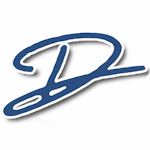

---

### An analysis on an insurance price dataset using linear regression and plotting ###

Darren Lewis


In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd  
from sklearn.linear_model import LinearRegression

---
Inspecting insurance.csv from Kaggle.com,  I confirmed that the dataset was clean and column names were descriptive and accurate.

The data shows price paid for insurance (charges) in relation to variables related to the insured individual.

In [2]:
insurance = pd.read_csv('insurance.csv')
print(insurance.head())
# print(' ')
# print(insurance.columns)
print('')
print(insurance.info())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


---
Inspecting columns by region for potential regional differences.  

In [3]:
regional_avg_prices = insurance.groupby('region').charges.mean().reset_index()
regional_avg_prices.columns = ['region','average_price']
print(regional_avg_prices)

      region  average_price
0  northeast   13406.384516
1  northwest   12417.575374
2  southeast   14735.411438
3  southwest   12346.937377


In [4]:
regional_avg_bmi = insurance.groupby('region').bmi.mean().reset_index()
regional_avg_bmi.columns = ['region','average_bmi']
print(regional_avg_bmi)

      region  average_bmi
0  northeast    29.173503
1  northwest    29.199785
2  southeast    33.355989
3  southwest    30.596615


In [5]:
region_age = insurance.groupby('region').age.mean().reset_index()
region_age.columns = ['region','average_age']
print(region_age)

      region  average_age
0  northeast    39.268519
1  northwest    39.196923
2  southeast    38.939560
3  southwest    39.455385


Grouping Price and BMI to view relationship

In [6]:
bmi_price = regional_avg_prices.merge(regional_avg_bmi)
print(bmi_price)

      region  average_price  average_bmi
0  northeast   13406.384516    29.173503
1  northwest   12417.575374    29.199785
2  southeast   14735.411438    33.355989
3  southwest   12346.937377    30.596615


---
Using an interquartile range function so i can examine data with and without fringe data

In [7]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] >= fence_low) & (df_in[col_name] <= fence_high)]
    return df_out


In [8]:
insurance_price_iqr = remove_outlier(insurance,'charges')

print(insurance_price_iqr)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1199 rows x 7 columns]


In [9]:
X = insurance.sample(100).iloc[:, 2].values.reshape(-1, 1)  # values converts it into a numpy array
Y = insurance.sample(100).iloc[:, 6].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

---
This is a linear regression of BMI with a sample size of 100 in relation to price,  in most cases with a sample of 100 the price increases with BMI.

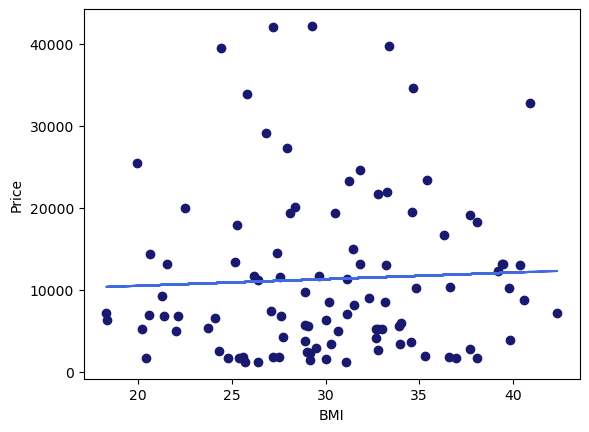

In [83]:
plt.scatter(X, Y, c='midnightblue')
plt.plot(X, Y_pred, color='royalblue')
plt.xlabel("BMI")
plt.ylabel("Price")
plt.show()

In [11]:
X1 = insurance_price_iqr.sample(100).iloc[:, 2].values.reshape(-1, 1)  # values converts it into a numpy array
Y1 = insurance_price_iqr.sample(100).iloc[:, 6].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X1, Y1)  # perform linear regression
Y_pred1 = linear_regressor.predict(X1)  # make predictions

Using interquartile range and removing the extreme prices from the dataset shows that the relation of BMI and Price is not as strong as originally thought,  the outliers influence the data heavily.  

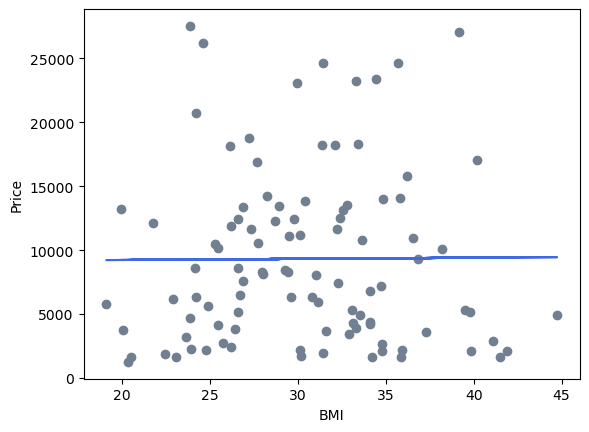

In [84]:
plt.scatter(X1, Y1, c='slategrey')
plt.plot(X1, Y_pred1, color='royalblue')
plt.xlabel("BMI")
plt.ylabel("Price")
plt.show()

---
Checking relationship between smokers and region to see if the higher prices in the southeast region can be explained by the smoker status since BMI was not a great predictor.

In [13]:
amt_smokers_region = insurance[insurance['smoker'] == 'yes'].groupby('region').size().reset_index()
amt_smokers_region.columns = ['region','amount_of_smokers']
print(amt_smokers_region)

      region  amount_of_smokers
0  northeast                 67
1  northwest                 58
2  southeast                 91
3  southwest                 58


In [14]:
total_count = insurance.groupby('region').age.count().reset_index()
total_count.columns = ['region','total_insured']
print(total_count)

      region  total_insured
0  northeast            324
1  northwest            325
2  southeast            364
3  southwest            325


Showing the percentage of smokers for each region, comparing to the regional average_prices below

In [39]:
smokers = amt_smokers_region.merge(total_count).reset_index(drop=True)
smokers1 = smokers.merge(regional_avg_prices).reset_index(drop=True)
smokers1['percentage_of_smokers'] = round(smokers1.amount_of_smokers / smokers1.total_insured * 100,2)

smoker_pct_price_avg = smokers1[['region','average_price','percentage_of_smokers']]
# print(smokers1)
# print(smoker_pct_price_avg)

      region  average_price  percentage_of_smokers
0  northeast   13406.384516                  20.68
1  northwest   12417.575374                  17.85
2  southeast   14735.411438                  25.00
3  southwest   12346.937377                  17.85


---
We can directly observe how closely the bar charts for percentage of smokers and average price align, they are **very** similar.

In [41]:
# smokers1.plot.bar(x='region',y='percentage_of_smokers')

array([<Axes: title={'center': 'average_price'}, xlabel='region'>,
       <Axes: title={'center': 'percentage_of_smokers'}, xlabel='region'>],
      dtype=object)

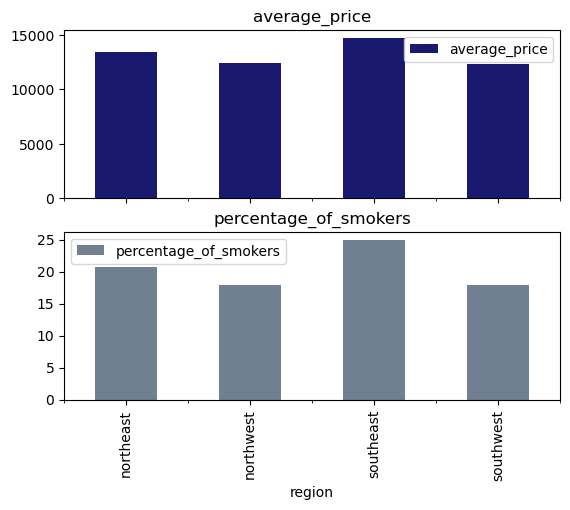

In [60]:
smoker_pct_price_avg.plot.bar(x='region',subplots=True,color = {'average_price': 'midnightblue','percentage_of_smokers':'slategrey'})

In [17]:
# print(regional_avg_prices)

In [42]:
# regional_avg_prices.plot.bar(x='region',y='average_price')

---
Finding the percentage increase for average prices comparing SouthEast to NorthEast and also SouthEast to SouthWest

In [19]:
def percent_increase(new_number,old_number):
    increase = new_number - old_number
    pct_increase = increase / old_number * 100
    return pct_increase

In [81]:
SE_NE_PctInc = percent_increase(14735.411438,13406.384516)
print('The south east region prices are {} percent higher than the north east region.'.format(round(SE_NE_PctInc,2)))

The south east region prices are 9.91 percent higher than the north east region.


In [82]:
SE_SW_PctInc = percent_increase(14735.411438,12346.937377)
print('The south east region prices are {} percent higher than the south west region.'.format(round(SE_SW_PctInc,2)))

The south east region prices are 19.34 percent higher than the south west region.


---
I can conclude after analysis that **BMI shows some correlation** to the price paid for insurance, but a **much stronger correlation can be found between smoker status**.  The higher instance of smokers in the SouthEast region of the United States translates rather directly to the higher insurance prices.